In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
a = np.array([10, 9])

In [3]:
a +=1

In [4]:
a

array([11, 10])

# 1

In [40]:
def f(x):
    return np.exp(-x) * x*(x**2-x-1)
def dif_finitas(func, xk, h):
    """
    Método de diferenças finitas
    """
    return (func(xk+h) - f(xk))/h

def gd(xk, alpha, grad):
    # if grad>0:
    #     return  xk - alpha*grad    
    return xk - (alpha*abs(grad))

In [13]:
X = np.arange(-2,3)

In [14]:
y = [f(xi) for xi in X]

In [41]:
x_0 = 1
gradiente = dif_finitas(f, 1, h=0.01)
x_1 = gd(1, 0.1, gradiente)

In [42]:
gradiente

0.37336696148128623

In [34]:
dif_finitas(f, 1, h=0.01)

0.37336696148128623

In [43]:
x_1

0.9626633038518714

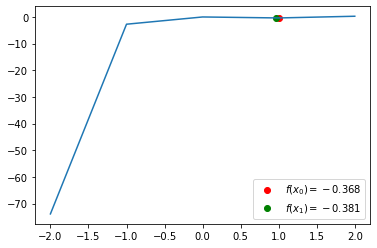

In [26]:
fig, ax = plt.subplots()
ax.plot(X,y)
ax.scatter([x_0], [f(x_0)], c='red',label='$f(x_0)={:.3f}$'.format(f(x_0)))
ax.scatter([x_1], [f(x_1)], c='green',label='$f(x_1)={:.3f}$'.format(f(x_1)))
plt.legend();

# 2

In [5]:
from sympy import *
import numpy as np

In [44]:
# criando um símbolo
x = Symbol('x')
# definindo a funcao
f = exp(-x)*x*(x**2-x-1)
f1 = lambdify(x,f)

In [91]:
x = np.arange(0, 2*np.pi, 0.01)

In [92]:
len(x)

629

In [46]:
# x=1
gradiente = f1(1)
x1 = gd(1, 0.1, gradiente)
x1

0.9632120558828557

In [38]:
gradiente

0.37336696148128623

In [36]:
X = [1]
for i in range(10):
    xk = X[-1]
    gradiente = f1(xk)
    x1 = gd(xk, 0.1, gradiente)
    X.append(x1)

In [37]:
X

[1,
 0.9632120558828557,
 0.9251469625900675,
 0.8859273057069937,
 0.8457060358285952,
 0.8046667620082225,
 0.7630226162445208,
 0.7210134299419273,
 0.6789010725263922,
 0.6369629678855798,
 0.5954840133176693]

In [9]:
x1,x2

(x1, x2)

In [10]:
x1 = Symbol('x1')
x2 = Symbol('x2')
# definindo a funcao
f = (4 - 2.1 * x1**2 + x1**2 / 3 ) * x1**3 + x1 * x2 + (-4 + 4 * x2**2) * x2**2
f1 = lambdify([x1,x2],f)

In [12]:
f1(1,1)

3.23333333333333

# 3

In [87]:
import matplotlib.animation as animation

In [66]:
def gradient_descent(x0, f, alpha, gmin, kmax):
    """
    x0: valor inicial
    f: derivada da função f (lambdify)
    """
    k = 0
    xk = x0
    X = []
    while (k < kmax) and (f(xk)>gmin):
        X.append(xk)
        g = f(xk)
        xk -= alpha*abs(g)
        k+=1
    return X

In [95]:
# criando um símbolo
x = Symbol('x')
# definindo a funcao
f = exp(-x)*x*(x**2-x-1)
f1 = lambdify(x,f)

In [89]:
def animate(i):    
    ax.plot(X, Y)

In [69]:
X = gradient_descent(x0=3, f=f1, alpha=0.1, gmin=0.1, kmax=20)
Y = [exp(-xi)*xi*(xi**2-xi-1) for xi in X]

In [96]:
f1(2)

0.2706705664732254

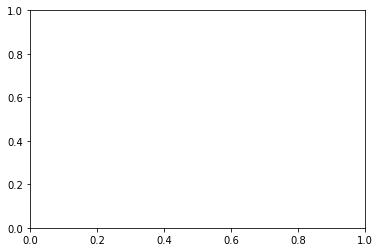

In [90]:
fig, ax = plt.subplots()
ani = animation.FuncAnimation(fig, animate, interval=1000) 
plt.show()